<a href="https://colab.research.google.com/github/manasuii/PINNS-MiniProjects/blob/main/1D_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt


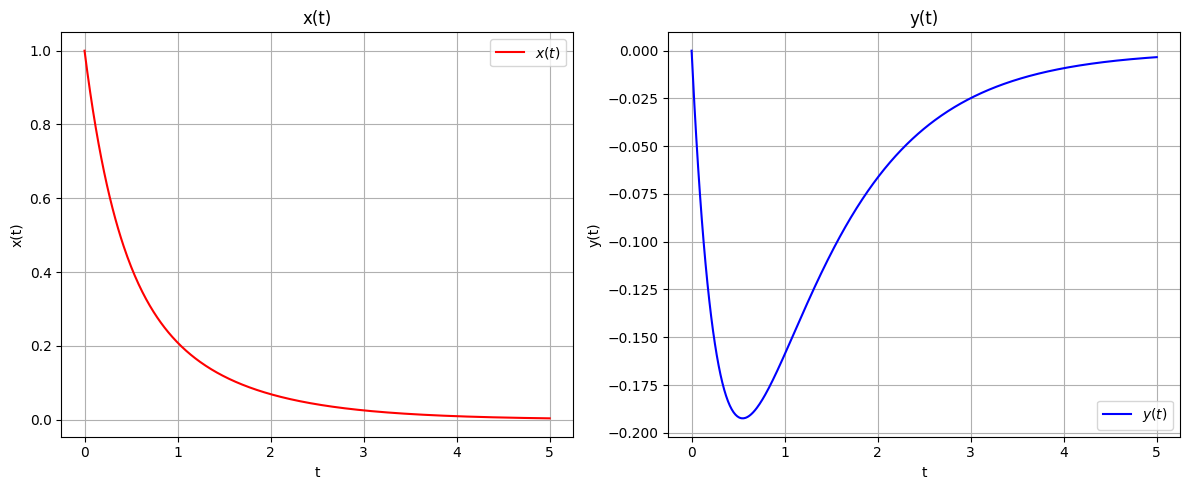

In [49]:
t = np.linspace(0, 5, 500)

x_analytical = 0.5 * np.exp(-t) + 0.5 * np.exp(-3 * t)
y_analytical = -0.5 * np.exp(-t) + 0.5 * np.exp(-3 * t)

plt.figure(figsize=(12,5))  # wider figure for side-by-side

# Left plot
plt.subplot(1, 2, 1)
plt.plot(t, x_analytical, label=r'$x(t)$', color='red')
plt.title("x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

# Right plot
plt.subplot(1, 2, 2)
plt.plot(t, y_analytical, label=r'$y(t)$', color='blue')
plt.title("y(t)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [50]:
import tensorflow as tf

In [51]:
#define the neural network
class PINN(tf.keras.Model):
  def __init__(self):
    super(PINN,self).__init__()
    self.dense1=tf.keras.layers.Dense(64,activation='tanh')
    self.dense2=tf.keras.layers.Dense(64,activation='tanh')
    self.dense3=tf.keras.layers.Dense(2,activation=None)

  def call(self,t):
    t=self.dense1(t)
    t=self.dense2(t)
    return self.dense3(t)

In [52]:
#define the loss function
def loss_fn(model,t):
  with tf.GradientTape() as tape1,tf.GradientTape() as tape2:
    tape1.watch(t)
    tape2.watch(t)
    output=model(t)
    x=output[:,0:1]
    y=output[:,1:2]

    dx_dt=tape1.gradient(x,t)
    dy_dt=tape2.gradient(y,t)

    res_x=dx_dt+2*x+y
    res_y=dy_dt+x+2*y

    init_loss_x=tf.square(x[0]-1)
    init_loss_y=tf.square(y[0]-0)

    loss=tf.reduce_mean(tf.square(res_x))+tf.reduce_mean(tf.square(res_y))+init_loss_x+init_loss_y

  return loss

In [53]:
#define the training function
def train(model,t,epochs,optimizer):
  for epoch in range(epochs):
    with tf.GradientTape() as tape:
      loss=loss_fn(model,t)
    grads=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(grads,model.trainable_variables))
    if epoch %500==0:
      print(f"Epoch{epoch}:Loss={loss.numpy()}")

In [54]:
#create the model and optimizer
model=PINN()
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

In [55]:
t=tf.convert_to_tensor(np.linspace(0,5,500)[:,None],dtype=tf.float32)

In [56]:
t=tf.convert_to_tensor(np.linspace(0,5,500)[:,None],dtype=tf.float32)

In [57]:
train(model,t,epochs=4000,optimizer=optimizer)

Epoch0:Loss=[2.2613842]
Epoch500:Loss=[0.00806378]
Epoch1000:Loss=[0.00082295]
Epoch1500:Loss=[0.00031276]
Epoch2000:Loss=[0.00022837]
Epoch2500:Loss=[0.00017068]
Epoch3000:Loss=[0.00019703]
Epoch3500:Loss=[9.2058246e-05]


In [58]:
t_test=np.linspace(0,5,500)[:,None]
x_pred,y_pred=model(t_test).numpy().T


In [59]:
x_true= 0.5 * np.exp(-t) + 0.5 * np.exp(-3 * t)
y_true= -0.5 * np.exp(-t) + 0.5 * np.exp(-3 * t)

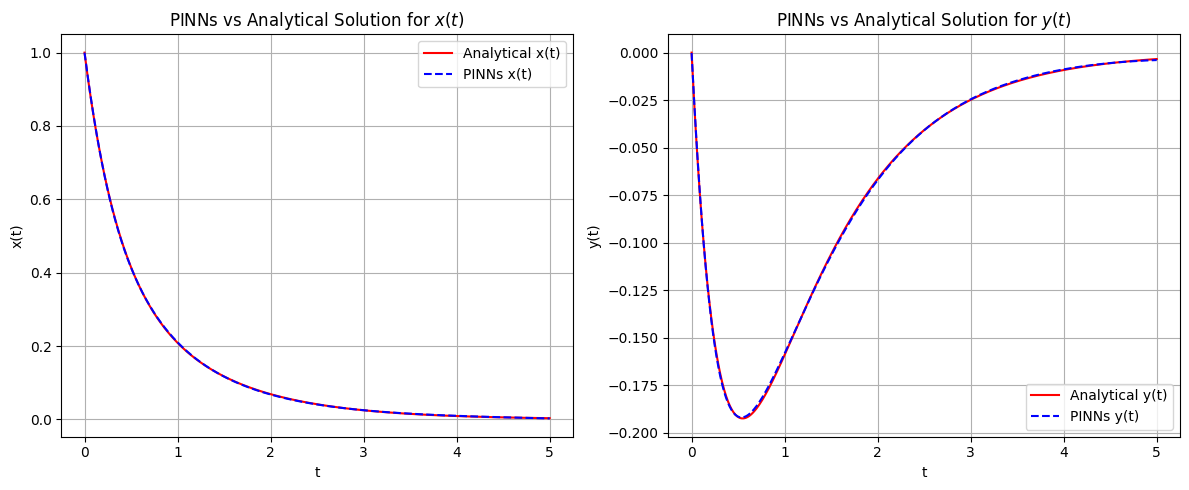

In [61]:
plt.figure(figsize=(12,5))  # wider figure for side-by-side

# Left subplot: x(t)
plt.subplot(1,2,1)
plt.plot(t_test, x_true, label="Analytical x(t)", color="red")
plt.plot(t_test, x_pred, label="PINNs x(t)", color="blue", linestyle='--')  # dotted line
plt.title(r'PINNs vs Analytical Solution for $x(t)$')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

# Right subplot: y(t)
plt.subplot(1,2,2)
plt.plot(t_test, y_true, label="Analytical y(t)", color="red")
plt.plot(t_test, y_pred, label="PINNs y(t)", color="blue", linestyle='--')  # dotted line
plt.title(r'PINNs vs Analytical Solution for $y(t)$')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
